# Part 1: Exploratory data analysis

In [1]:
import pandas as pd
import numpy as np

from sklearn import datasets, linear_model
import matplotlib.pyplot as plt

In [2]:
# find file paths and load data
import h5py
import os
print(os.path.abspath('.'))

/Users/christxx/Desktop/INFO656/Assignment/Final_Prdiction on Ebay dataset


In [3]:
path = '/Users/christxx/Desktop/INFO656/Assignment/Final_Prdiction on Ebay dataset/dataset/auction.csv'
retail_df = pd.read_csv(path)

In [4]:
retail = retail_df
retail.head(10)

,auctionid,bid,bidtime,bidder,bidderrate,openbid,price,item,auction_type
0,1638893549,175.00,2.230949,schadenfreud,0.0,99.0,177.5,Cartier wristwatch,3 day auction
1,1638893549,100.00,2.600116,chuik,0.0,99.0,177.5,Cartier wristwatch,3 day auction
2,1638893549,120.00,2.600810,kiwisstuff,2.0,99.0,177.5,Cartier wristwatch,3 day auction
3,1638893549,150.00,2.601076,kiwisstuff,2.0,99.0,177.5,Cartier wristwatch,3 day auction
4,1638893549,177.50,2.909826,eli.flint@flightsafety.co,4.0,99.0,177.5,Cartier wristwatch,3 day auction
5,1639453840,1.00,0.355856,bfalconb,2.0,1.0,355.0,Cartier wristwatch,3 day auction
6,1639453840,1.25,0.484757,sbord,1.0,1.0,355.0,Cartier wristwatch,3 day auction
7,1639453840,1.50,0.492639,bfalconb,2.0,1.0,355.0,Cartier wristwatch,3 day auction
8,1639453840,25.00,0.494630,sbord,1.0,1.0,355.0,Cartier wristwatch,3 day auction
9,1639453840,2.00,0.511169,bfalconb,2.0,1.0,355.0,Cartier wristwatch,3 day auction


In [5]:
retail.shape

(10681, 9)

In [6]:
# check missing values and drop them: There are 37 (690-653) cases with missing values. 
retail.isnull().sum()
retail = retail.replace('?', np.nan)
retail = retail.dropna(axis=0, how='any')
retail.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10654 entries, 0 to 10680
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   auctionid     10654 non-null  int64  
 1   bid           10654 non-null  float64
 2   bidtime       10654 non-null  float64
 3   bidder        10654 non-null  object 
 4   bidderrate    10654 non-null  float64
 5   openbid       10654 non-null  float64
 6   price         10654 non-null  float64
 7   item          10654 non-null  object 
 8   auction_type  10654 non-null  object 
dtypes: float64(5), int64(1), object(3)
memory usage: 832.3+ KB


In [7]:
# check values ranges in categorical columns
retail_catv = retail.select_dtypes(include=['object'])
for col in retail_catv.columns:
  print("Attribute", str(col))
  print(retail_catv[col].value_counts().sort_index(), end='\n\n')

Attribute bidder
**balancedbody4u**     9
*champaignbubbles*     3
-kim-                  1
100buyer               1
11860256              14
                      ..
zpalanpur              2
zrt800                 1
zsmitgea               2
ztm25                  1
zzz45s                 1
Name: bidder, Length: 3385, dtype: int64

Attribute item
Cartier wristwatch     1953
Palm Pilot M515 PDA    5917
Xbox game console      2784
Name: item, dtype: int64

Attribute auction_type
3 day auction    2019
5 day auction    1617
7 day auction    7018
Name: auction_type, dtype: int64



In [8]:
# review the dataset after cleaning 
retail.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10654 entries, 0 to 10680
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   auctionid     10654 non-null  int64  
 1   bid           10654 non-null  float64
 2   bidtime       10654 non-null  float64
 3   bidder        10654 non-null  object 
 4   bidderrate    10654 non-null  float64
 5   openbid       10654 non-null  float64
 6   price         10654 non-null  float64
 7   item          10654 non-null  object 
 8   auction_type  10654 non-null  object 
dtypes: float64(5), int64(1), object(3)
memory usage: 832.3+ KB


In [9]:
from sklearn.preprocessing import LabelEncoder
LabelEncoder = LabelEncoder()

In [10]:
for col in retail.columns.values:
    # If the dtype is object, then do the numeric transformation
    if retail[col].dtype=='object':
        retail[col]=LabelEncoder.fit_transform(retail[col].astype(str))

In [11]:
#inspect if the label encoding was successful
retail.head(10)

,auctionid,bid,bidtime,bidder,bidderrate,openbid,price,item,auction_type
0,1638893549,175.00,2.230949,2726,0.0,99.0,177.5,0,0
1,1638893549,100.00,2.600116,626,0.0,99.0,177.5,0,0
2,1638893549,120.00,2.600810,1763,2.0,99.0,177.5,0,0
3,1638893549,150.00,2.601076,1763,2.0,99.0,177.5,0,0
4,1638893549,177.50,2.909826,1045,4.0,99.0,177.5,0,0
5,1639453840,1.00,0.355856,353,2.0,1.0,355.0,0,0
6,1639453840,1.25,0.484757,2720,1.0,1.0,355.0,0,0
7,1639453840,1.50,0.492639,353,2.0,1.0,355.0,0,0
8,1639453840,25.00,0.494630,2720,1.0,1.0,355.0,0,0
9,1639453840,2.00,0.511169,353,2.0,1.0,355.0,0,0


In [12]:
retail.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10654 entries, 0 to 10680
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   auctionid     10654 non-null  int64  
 1   bid           10654 non-null  float64
 2   bidtime       10654 non-null  float64
 3   bidder        10654 non-null  int64  
 4   bidderrate    10654 non-null  float64
 5   openbid       10654 non-null  float64
 6   price         10654 non-null  float64
 7   item          10654 non-null  int64  
 8   auction_type  10654 non-null  int64  
dtypes: float64(5), int64(4)
memory usage: 832.3 KB


In [13]:
# correlation between fetures
retail_numv = retail.select_dtypes(include=['int64', 'float64'])
retail_numv.corr(method ='pearson')

,auctionid,bid,bidtime,bidder,bidderrate,openbid,price,item,auction_type
auctionid,1.000000,-0.320638,0.102544,-0.009697,-0.006103,-0.147379,-0.378799,0.925662,-0.017721
bid,-0.320638,1.000000,0.133478,0.027300,-0.016785,0.609901,0.858244,-0.459386,0.048377
bidtime,0.102544,0.133478,1.000000,0.006044,-0.031390,0.055343,-0.089474,0.113124,0.446966
bidder,-0.009697,0.027300,0.006044,1.000000,0.026980,0.023653,0.033482,-0.017867,-0.004425
bidderrate,-0.006103,-0.016785,-0.031390,0.026980,1.000000,-0.002077,-0.016005,-0.003758,0.020851
openbid,-0.147379,0.609901,0.055343,0.023653,-0.002077,1.000000,0.495222,-0.228364,-0.046858
price,-0.378799,0.858244,-0.089474,0.033482,-0.016005,0.495222,1.000000,-0.550026,0.073689
item,0.925662,-0.459386,0.113124,-0.017867,-0.003758,-0.228364,-0.550026,1.000000,-0.036291
auction_type,-0.017721,0.048377,0.446966,-0.004425,0.020851,-0.046858,0.073689,-0.036291,1.000000


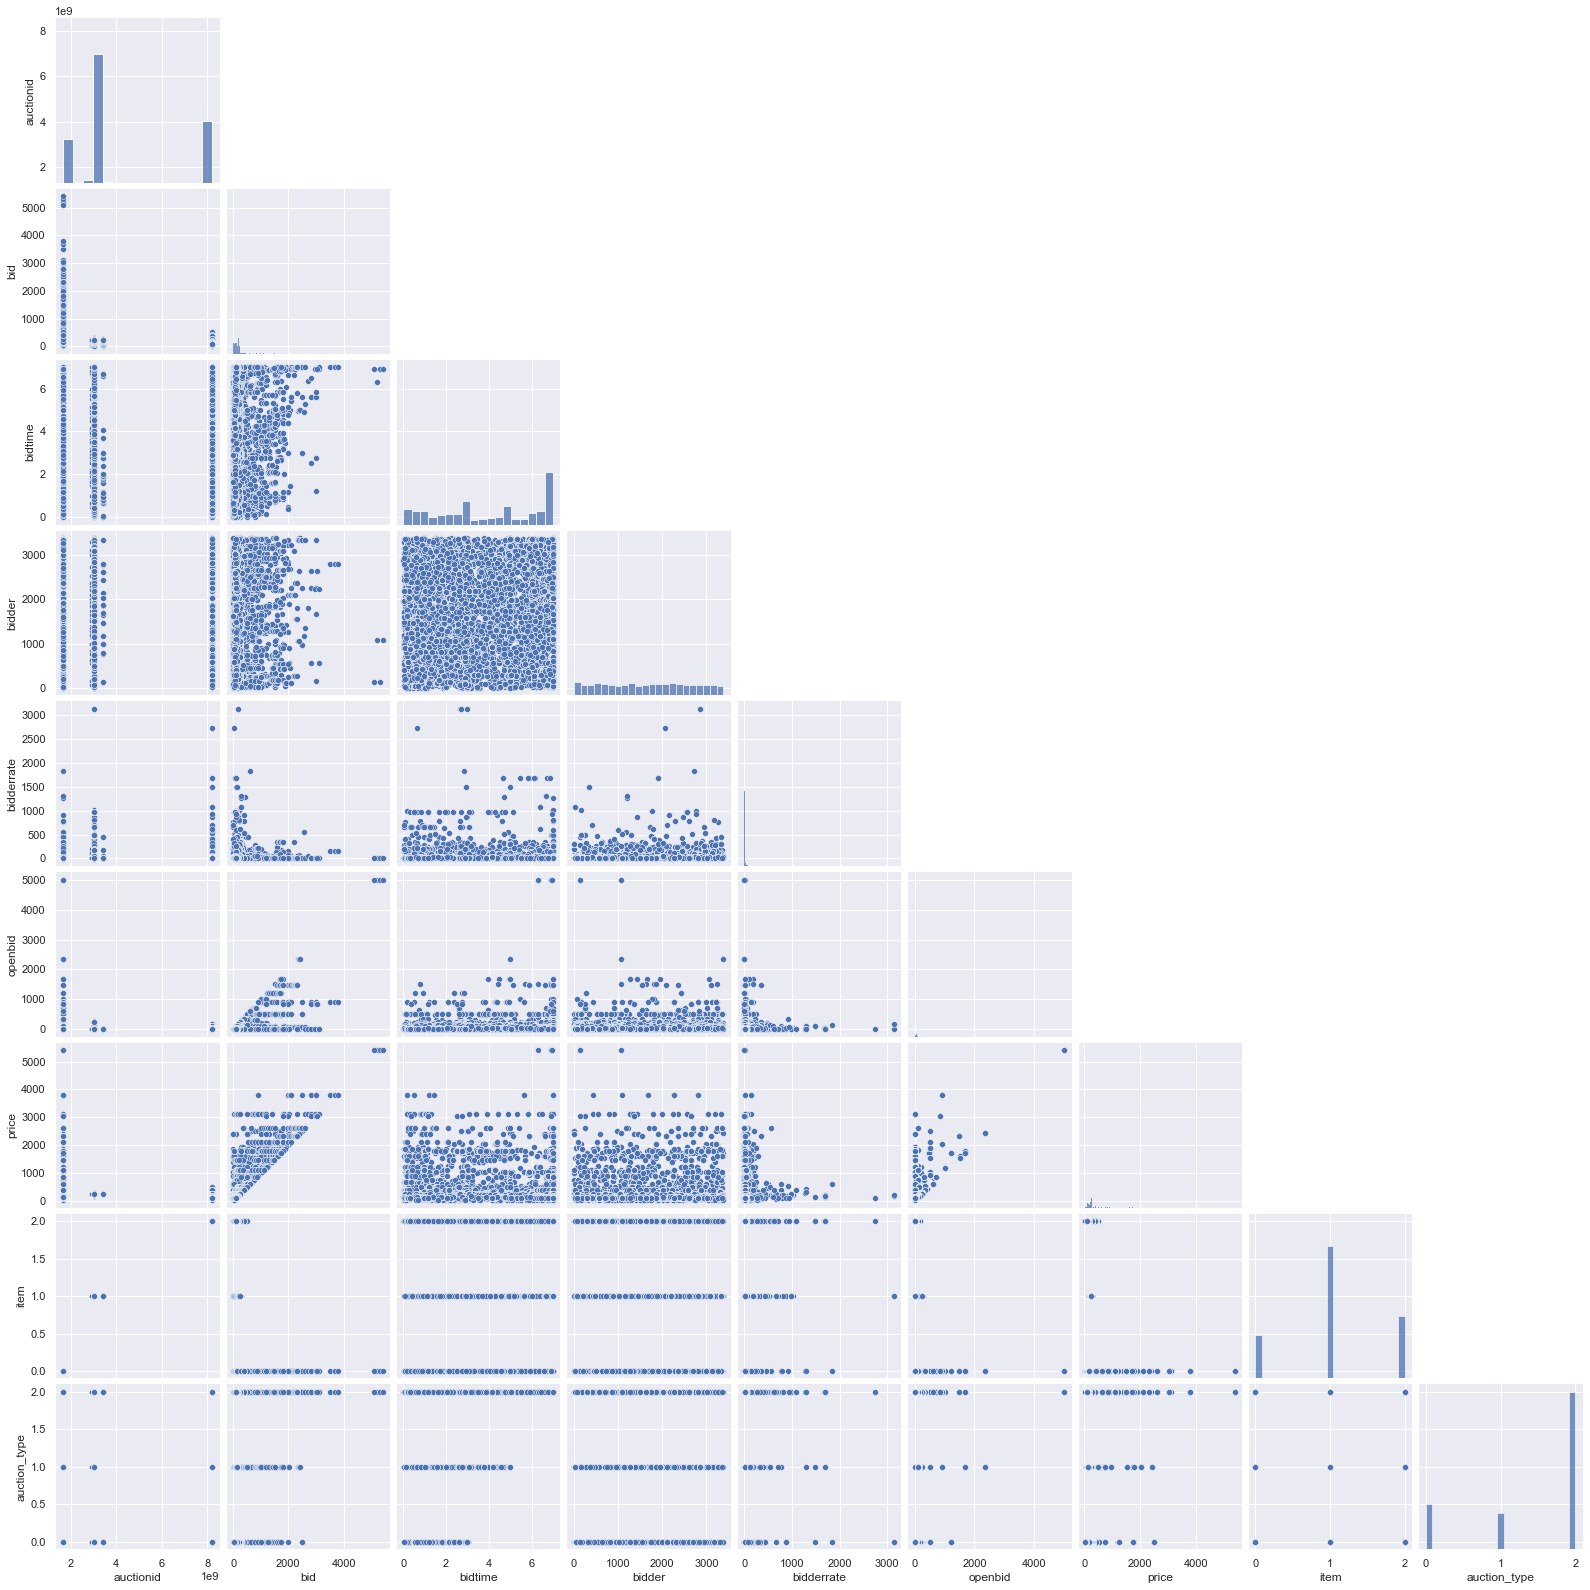

In [14]:
import seaborn as sns
sns.set(style="darkgrid")

# data visualization of features
graph1 = sns.pairplot(retail, height=2.5)
for i, j in zip(*np.triu_indices_from(graph1.axes, 1)):
    graph1.axes[i, j].set_visible(False)

# Part 2: Prediction model of recommended price

## 1. Import dataset

In [15]:
#split dataset
X = retail.drop(["auctionid","price","bidder"],1)
X.bid = X.bid.astype(int)
X.openbid = X.openbid.astype(int)
X.bidderrate = X.bidderrate.astype(int)
X.bidtime = X.bidtime.astype(int)
X.head(10)

,bid,bidtime,bidderrate,openbid,item,auction_type
0,175,2,0,99,0,0
1,100,2,0,99,0,0
2,120,2,2,99,0,0
3,150,2,2,99,0,0
4,177,2,4,99,0,0
5,1,0,2,1,0,0
6,1,0,1,1,0,0
7,1,0,2,1,0,0
8,25,0,1,1,0,0
9,2,0,2,1,0,0


In [16]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10654 entries, 0 to 10680
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   bid           10654 non-null  int64
 1   bidtime       10654 non-null  int64
 2   bidderrate    10654 non-null  int64
 3   openbid       10654 non-null  int64
 4   item          10654 non-null  int64
 5   auction_type  10654 non-null  int64
dtypes: int64(6)
memory usage: 582.6 KB


In [17]:
retail['price'] = retail['price'].astype(int)
y = retail['price']
y.head(10)

0    177
1    177
2    177
3    177
4    177
5    355
6    355
7    355
8    355
9    355
Name: price, dtype: int64

In [18]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.4, random_state=42)
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((6392, 6), (6392,), (4262, 6), (4262,))

## 2. Preposessing

In [20]:
from sklearn.preprocessing import StandardScaler
# check how StandardScaler is changing the mean and std of the data - for column 0
approval_scaled = StandardScaler().fit_transform(X)
approval_scaled[:, 0].mean(), approval_scaled[:, 0].std()

(-4.268325050558139e-17, 1.0)

## 3. Train the model

In [21]:
from sklearn.pipeline import Pipeline
from sklearn.linear_model import ElasticNetCV
from sklearn.preprocessing import StandardScaler

In [22]:
# Create linear regression object
from sklearn import linear_model
# regr = LogisticRegression(random_state=0, max_iter =100000) 0.117
regr = linear_model.LinearRegression()

In [23]:
# The pipeline can be used as any other estimator
# and avoids leaking the test set into the train set
step_list = [('scaler', StandardScaler()), 
             ('regr', regr)
            ]
pipe = Pipeline(steps=step_list)
pipe

Pipeline(steps=[('scaler', StandardScaler()), ('regr', LinearRegression())])

In [24]:
pipe.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()), ('regr', LinearRegression())])

## 4. Evaluation

In [25]:
pipe.score(X_test, y_test)

0.8356278730984684

In [26]:
# Make predictions using the testing set
y_pred = pipe.predict(X_test)

In [27]:
from sklearn.metrics import mean_squared_error, r2_score

In [28]:
# The coefficients
print('Coefficients: \n', regr.coef_)
# The mean squared error
print('Mean squared error: %.2f'
      % mean_squared_error(y_test, y_pred))
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f'
      % r2_score(y_test, y_pred))

Coefficients: 
 [ 356.0728273  -108.64057371   -5.89301522  -15.58784275  -64.43247404
   63.32037307]
Mean squared error: 31097.58
Coefficient of determination: 0.84


## 5. Function to predict

In [29]:
def bidprice_model_test(row):
    model = pipe.fit(X_train, y_train)
    result = model.predict(row)
    return result

In [30]:
X_train.head(10)

,bid,bidtime,bidderrate,openbid,item,auction_type
8992,110,6,0,9,2,2
2706,125,1,0,50,1,0
326,52,0,100,1,0,1
2499,1,0,6,1,1,0
1004,385,2,3,99,0,2
4852,120,3,1,100,1,2
7403,135,4,1,1,1,2
4011,175,4,24,70,1,1
7198,161,5,26,1,1,2
534,80,1,2,10,0,1


In [31]:
price_test_set = [[110,3,5,10,0,1]]
bidprice_model_test(price_test_set)

array([318.94864266])

# Part 3: Prediction model of bid time

In [32]:
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.layers.experimental import preprocessing

## 1. Import dataset

In [33]:
#split dataset
X_bid = retail.drop(["auctionid","bidtime","bidder"],1)
X_bid.bid = X_bid.bid.astype(int)
X_bid.openbid = X_bid.openbid.astype(int)
X_bid.bidderrate = X_bid.bidderrate.astype(int)
X_bid.head(10)

,bid,bidderrate,openbid,price,item,auction_type
0,175,0,99,177,0,0
1,100,0,99,177,0,0
2,120,2,99,177,0,0
3,150,2,99,177,0,0
4,177,4,99,177,0,0
5,1,2,1,355,0,0
6,1,1,1,355,0,0
7,1,2,1,355,0,0
8,25,1,1,355,0,0
9,2,2,1,355,0,0


In [34]:
retail['bidtime'] = retail['bidtime'].astype(int)
y_bid = retail['bidtime']
y_bid.head(10)

0    2
1    2
2    2
3    2
4    2
5    0
6    0
7    0
8    0
9    0
Name: bidtime, dtype: int64

## 2. Preposessing

In [35]:
# check how StandardScaler is changing the mean and std of the data - for column 0
X_bid = StandardScaler().fit_transform(X_bid)
X_bid[:, 0].mean(), X_bid[:, 0].std()

(-4.268325050558139e-17, 1.0)

As bid time can be categorical(0-7days), we use to_categorical changing the type of this variable

In [36]:
from tensorflow.keras.utils import to_categorical
y_bid = to_categorical(y_bid)
print(y_bid[:5])

[[0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0.]]


In [37]:
# Split the targets into training/testing sets
from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(X_bid, y_bid, test_size = 0.3,
                                                    random_state=42)

X_train.shape, y_train.shape, X_test.shape, y_test.shape

((7457, 6), (7457, 7), (3197, 6), (3197, 7))

## 3. Train the model

In [63]:
def bidtime_model_test():
    # v1
    # model = tf.keras.Sequential()
    # model.add(layers.Dense(7))
    # model.add(layers.Dense(7))
    
    model = tf.keras.Sequential()
    model.add(layers.Dense(7))
    model.add(layers.Flatten())
    model.add(layers.Dense(7))
    model.add(layers.Dense(y_test.shape[1], activation='softmax'))

    model.compile(optimizer='adam',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

    return model

In [64]:
test_model = bidtime_model_test()
test_model.fit(X_train, y_train, epochs=10, validation_split=0.2)

Epoch 1/10
187/187 [==============================] - 0s 1ms/step - loss: 1.7603 - accuracy: 0.4035 - val_loss: 1.6326 - val_accuracy: 0.4330
Epoch 2/10
187/187 [==============================] - 0s 673us/step - loss: 1.5547 - accuracy: 0.4640 - val_loss: 1.5408 - val_accuracy: 0.4430
Epoch 3/10
187/187 [==============================] - 0s 675us/step - loss: 1.4715 - accuracy: 0.4691 - val_loss: 1.4771 - val_accuracy: 0.4544
Epoch 4/10
187/187 [==============================] - 0s 668us/step - loss: 1.4076 - accuracy: 0.4766 - val_loss: 1.4273 - val_accuracy: 0.4578
Epoch 5/10
187/187 [==============================] - 0s 676us/step - loss: 1.3584 - accuracy: 0.4987 - val_loss: 1.3904 - val_accuracy: 0.4786
Epoch 6/10
187/187 [==============================] - 0s 663us/step - loss: 1.3214 - accuracy: 0.5135 - val_loss: 1.3590 - val_accuracy: 0.4953
Epoch 7/10
187/187 [==============================] - 0s 661us/step - loss: 1.2951 - accuracy: 0.5284 - val_loss: 1.3360 - val_accuracy: 0

## 4. Model evaluation

In [65]:
scores = test_model.evaluate(X_train, y_train)
print("trainset loss：%f，accuracy：%2.2f%%" % (scores[0],\
                                    scores[1] * 100))

234/234 [==============================] - 0s 546us/step - loss: 1.2615 - accuracy: 0.5384
trainset loss：1.261543，accuracy：53.84%


In [66]:
scores = test_model.evaluate(X_test, y_test)
print("testset loss：%f，accuracy：%2.2f%%" % (scores[0],\
                                    scores[1] * 100))

100/100 [==============================] - 0s 575us/step - loss: 1.3054 - accuracy: 0.5302
testset loss：1.305390，accuracy：53.02%


In [67]:
test_model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_11 (Dense)             (None, 7)                 49        
_________________________________________________________________
flatten_3 (Flatten)          (None, 7)                 0         
_________________________________________________________________
dense_12 (Dense)             (None, 7)                 56        
_________________________________________________________________
dense_13 (Dense)             (None, 7)                 56        
Total params: 161
Trainable params: 161
Non-trainable params: 0
_________________________________________________________________


In [68]:
training_history = test_model.fit(X_train, y_train, epochs=10, validation_split=0.2)

Epoch 1/10
187/187 [==============================] - 0s 909us/step - loss: 1.2511 - accuracy: 0.5519 - val_loss: 1.2965 - val_accuracy: 0.5134
Epoch 2/10
187/187 [==============================] - 0s 697us/step - loss: 1.2468 - accuracy: 0.5564 - val_loss: 1.3000 - val_accuracy: 0.5355
Epoch 3/10
187/187 [==============================] - 0s 683us/step - loss: 1.2434 - accuracy: 0.5633 - val_loss: 1.2951 - val_accuracy: 0.5288
Epoch 4/10
187/187 [==============================] - 0s 676us/step - loss: 1.2417 - accuracy: 0.5678 - val_loss: 1.2945 - val_accuracy: 0.5395
Epoch 5/10
187/187 [==============================] - 0s 676us/step - loss: 1.2400 - accuracy: 0.5685 - val_loss: 1.3006 - val_accuracy: 0.5389
Epoch 6/10
187/187 [==============================] - 0s 663us/step - loss: 1.2405 - accuracy: 0.5697 - val_loss: 1.2891 - val_accuracy: 0.5483
Epoch 7/10
187/187 [==============================] - 0s 660us/step - loss: 1.2389 - accuracy: 0.5735 - val_loss: 1.2933 - val_accuracy:

In [69]:
training_history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

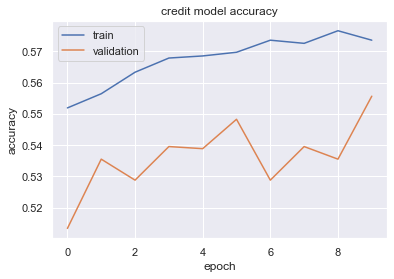

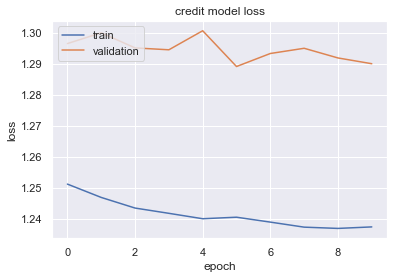

In [70]:
# summarize history for accuracy
plt.plot(training_history.history['accuracy'])
plt.plot(training_history.history['val_accuracy'])
plt.title('credit model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(training_history.history['loss'])
plt.plot(training_history.history['val_loss'])
plt.title('credit model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

## 5. Function to predict

In [71]:
result = test_model.predict(X_test)
print(result)
print('-'*20)
print(result.shape)

[[1.48610619e-03 4.44109831e-03 2.07627006e-02 ... 1.17454141e-01
  1.20348081e-01 7.10054159e-01]
 [1.61269128e-01 1.54652566e-01 5.43342769e-01 ... 1.13196075e-01
  8.26662144e-05 8.40935911e-07]
 [1.24460407e-01 1.37283906e-01 5.73871791e-01 ... 1.35277554e-01
  9.49687383e-05 1.18042146e-06]
 ...
 [1.35640129e-01 1.07259199e-01 3.12752157e-01 ... 3.57704848e-01
  9.81571618e-03 7.28780124e-03]
 [1.17415193e-05 7.02472113e-04 6.47629648e-02 ... 2.66720802e-01
  4.73885953e-01 1.70062389e-02]
 [3.60539816e-02 2.48969775e-02 3.11652962e-02 ... 1.02195516e-01
  1.11299582e-01 6.59017861e-01]]
--------------------
(3197, 7)
